# Tangent fermions: density of states

In this notebook we show how to use the code in tangent_fermions.py to calculate DOS in a system. Let us do so by reproducing figure 10.

In [1]:
import tangent_fermions as tf
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

But first, let us do a less time consuming version (smaller system)

In [2]:
def make_DOS(parameters, number_of_realisations = 1000, number_of_bands = int(200), number_of_bins =  500):
    
    ''' Calculates and plots the density of states for 1000 realisations of magnetic field configuration.'''
    
    #Solve generalised eigenproblem
    realisations = np.arange(0,number_of_realisations,1, dtype = int)
    spectrum = np.zeros((number_of_realisations, number_of_bands))

    for realisation in realisations:
        print(realisation+1)
        Phi, H, P = tf.operators_real(parameters)
        eigenvalues = sla.eigsh(H, M=P, k = number_of_bands, tol = 0, sigma = 0.00001,which = 'LM',return_eigenvectors = False)
        
        spectrum[int(realisation)] = np.sort(eigenvalues)
    
    binning = np.linspace(-0.05,0.05, number_of_bins, endpoint = True)
    histogram, bin_edges = np.histogram(spectrum, bins = binning, density = False )
    
    return histogram, bin_edges

In [3]:
parameters = dict(
    Nx = 51,
    Ny = 201,
    N1 = 50,
    d1 = 50,
    N2 = 50,
    kx = 0,
    ky = 0,
    potential = lambda x,y: 0*x,
    mass = lambda x,y: 0*x,
    B1 = 0.5*2*pi/50,
    disorder = 0
)

histogram_clean, bin_edges = make_DOS(parameters, number_of_realisations = 1, number_of_bands = 50, number_of_bins = 500)

1


In [4]:
parameters['disorder'] = 2*pi/50
histogram_disordered, bin_edges = make_DOS(parameters, number_of_realisations = 100, number_of_bands = 50, number_of_bins = 500)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


Text(0.5, 0, '$E$ ($\\sqrt{2\\hbar e v_0^2 B}$)')

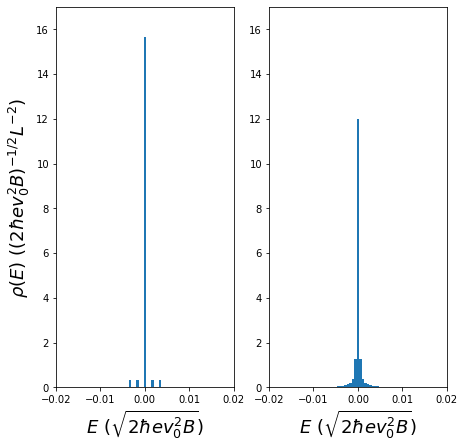

In [5]:
binning = np.linspace(-0.05,0.05, len(bin_edges-1), endpoint = True)
first_ll = np.sqrt(2*pi/50)
de = (np.roll(binning,-1)-binning)[0]
number_of_realisations = 100

fig = plt.figure(figsize = (7,7))

ax1 = fig.add_subplot(121)
ax1.bar((bin_edges[1:]+bin_edges[:-1])/2/first_ll,histogram_clean/de*first_ll/parameters['Nx']/parameters['Nx']/2,width = de/first_ll)
ax1.set_xlim(-0.02,0.02)
ax1.set_ylim(0,17)
ax1.set_xlabel(r'$E$ ($\sqrt{2\hbar e v_0^2 B}$)',fontsize = 18)
ax1.set_ylabel(r'$\rho(E)$ ($(2\hbar e v_0^2 B)^{-1/2}L^{-2}$)',fontsize = 18)

ax2 = fig.add_subplot(122)
ax2.bar((bin_edges[1:]+bin_edges[:-1])/2/first_ll,histogram_disordered/number_of_realisations/de*first_ll/parameters['Nx']/parameters['Nx']/2,width = de/first_ll)
ax2.set_xlim(-0.02,0.02)
ax2.set_ylim(0,17)
ax2.set_xlabel(r'$E$ ($\sqrt{2\hbar e v_0^2 B}$)',fontsize = 18)


The next cell contains the parameters to reproduce the figure in the review

In [ ]:
parameters = dict(
    Nx = 101,
    Ny = 401,
    N1 = 100,
    d1 = 100,
    N2 = 100,
    kx = 0,
    ky = 0,
    potential = lambda x,y: 0*x,
    mass = lambda x,y: 0*x,
    B1 = pi/100,
    disorder = 0
)

histogram_clean, bin_edges = make_DOS(parameters, number_of_realisations = 1, number_of_bands = 200, number_of_bins = 2000)

parameters['disorder'] = 2*pi/100
histogram_disordered, bin_edges = make_DOS(parameters, number_of_realisations = 1000, number_of_bands = 200, number_of_bins = 2000)

binning = np.linspace(-0.05,0.05, len(bin_edges-1), endpoint = True)
first_ll = np.sqrt(2*pi/100)
de = (np.roll(binning,-1)-binning)[0]
number_of_realisations = 1000

fig = plt.figure(figsize = (7,7))

ax1 = fig.add_subplot(121)
ax1.bar((bin_edges[1:]+bin_edges[:-1])/2/first_ll,histogram_clean/de*first_ll/parameters['Nx']/parameters['Nx']/2,width = de/first_ll)
ax1.set_xlim(-0.02,0.02)
#ax1.set_ylim(0,17)
ax1.set_xlabel(r'$E$ ($\sqrt{2\hbar e v_0^2 B}$)',fontsize = 18)
ax1.set_ylabel(r'$\rho(E)$ ($(2\hbar e v_0^2 B)^{-1/2}L^{-2}$)',fontsize = 18)

ax2 = fig.add_subplot(122)
ax2.bar((bin_edges[1:]+bin_edges[:-1])/2/first_ll,histogram_disordered/number_of_realisations/de*first_ll/parameters['Nx']/parameters['Nx']/2,width = de/first_ll)
ax2.set_xlim(-0.02,0.02)
#ax2.set_ylim(0,17)
ax2.set_xlabel(r'$E$ ($\sqrt{2\hbar e v_0^2 B}$)',fontsize = 18)


1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
